In [271]:
#import des packages necessaires
import numpy as np 
import pandas as pd
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *
import pydicom, kornia, cv2


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass

In [272]:
#import datasets
train_dcm_path = get_dicom_files(r"C:\Users\sesa638933\Desktop\OC\P7\train\thetrain")
test_dcm_path = get_dicom_files(r"C:\Users\sesa638933\Desktop\OC\P7\test\test")

print("train len:", len(train_dcm_path), "\ntest len:", len(test_dcm_path))

train len: 242 
test len: 50


In [273]:
train_dcm2csv_df = pd.read_csv(r'C:\Users\sesa638933\Desktop\OC\P7\dicom_metadata_train.csv')
train_dcm2csv_df

,MultiImageType,ImageType,ImageType1,InstanceCreationDate,InstanceCreationTime,SOPClassUID,SOPInstanceUID,StudyDate,SeriesDate,ContentDate,...,WindowCenter,WindowWidth,ImageType2,KVP,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,AcquisitionNumber,ImageType3
0,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.71157989004260882669063657298878631277,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.32467620439025796224161045738740609166,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.74856220852423198555486702707715689735,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.90865692473901867788171201500090752135,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.44687741644515558201307438644049640452,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.84195286770915865285283493888654502396,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1734,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.11211536623788107002735898165090841538,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1735,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.97523800054763336883452748817549462853,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1736,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.13690494879381638155074323667482680582,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
train_df = pd.read_csv(r'C:\Users\sesa638933\Desktop\OC\P7\train.csv')
train_df

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258,0
1,1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125,15
2,1.2.826.0.1.3680043.8.498.10038426859954986240523417641213777162,12
3,1.2.826.0.1.3680043.8.498.10050991192143676483577217922037244257,14
4,1.2.826.0.1.3680043.8.498.10053309524595490852815579052225336016,3
...,...,...
1733,1.2.826.0.1.3680043.8.498.99711016467406172920578985719244800351,14
1734,1.2.826.0.1.3680043.8.498.99727280485333900933067489723088200708,11
1735,1.2.826.0.1.3680043.8.498.99935008698914755885142961280499046059,3
1736,1.2.826.0.1.3680043.8.498.99969671777553755311455387279891445345,2


In [275]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SOPInstanceUID  1738 non-null   object
 1   Target          1738 non-null   object
dtypes: object(2)
memory usage: 27.3+ KB


In [276]:
train_df['Target'].unique()

array(['0 ', '15 ', '12 ', '14 ', '3 ', '13 20 ', '5 ', '17 ', '2 ', '6 ',
       '9 21 ', '9 ', '16 ', '7 ', '11 ', '1 ', '20 ', '21 ', '13 ',
       '0 3 ', '8 ', '1 11 12 ', '0 15 ', '19 ', '10 ', '4 ', '11 12 ',
       '1 6 ', '10 19 ', '5 8 ', '3 15 ', '7 9 ', '15 19 ', '2 13 20 ',
       '18 ', '3 6 ', '2 20 ', '10 11 19 ', '1 12 ', '3 7 ', '8 16 '],
      dtype=object)

As you see, some of dicom files have more that one class (target)! So, we have a multilabel classification problem. This is my strategy:

First we add all labels to the "train_df" as new columns by their orders and set all to zero. Then by considering the numbers in the target column of each record, we replace 1 in the columns related that number. 

For example, suppose that target have two numbers: "1 , 6". These numbers represent "ankle, feet". We replace 1 in "ankle" and "feet" columns of that record.

In [277]:
train_df['Abdomen'] = 0
train_df['Ankle'] = 0
train_df['Cervical Spine'] = 0
train_df['Chest'] = 0
train_df['Clavicles'] = 0
train_df['Elbow'] = 0
train_df['Feet'] = 0
train_df['Finger'] = 0
train_df['Forearm'] = 0
train_df['Hand'] = 0
train_df['Hip'] = 0
train_df['Knee'] = 0
train_df['Lower Leg'] = 0
train_df['Lumbar Spine'] = 0
train_df['Others'] = 0
train_df['Pelvis'] = 0
train_df['Shoulder'] = 0
train_df['Sinus'] = 0
train_df['Skull'] = 0
train_df['Thigh'] = 0
train_df['Thoracic Spine'] = 0
train_df['Wrist'] = 0
train_df

,SOPInstanceUID,Target,Abdomen,Ankle,Cervical Spine,Chest,Clavicles,Elbow,Feet,Finger,...,Lower Leg,Lumbar Spine,Others,Pelvis,Shoulder,Sinus,Skull,Thigh,Thoracic Spine,Wrist
0,1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.10038426859954986240523417641213777162,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.2.826.0.1.3680043.8.498.10050991192143676483577217922037244257,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.10053309524595490852815579052225336016,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1.2.826.0.1.3680043.8.498.99711016467406172920578985719244800351,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1734,1.2.826.0.1.3680043.8.498.99727280485333900933067489723088200708,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1735,1.2.826.0.1.3680043.8.498.99935008698914755885142961280499046059,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1736,1.2.826.0.1.3680043.8.498.99969671777553755311455387279891445345,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [278]:
labels = ['Abdomen', 'Ankle', 'Cervical Spine', 'Chest', 'Clavicles', 'Elbow', 'Feet', 'Finger', 'Forearm', 'Hand', 'Hip', 'Knee', 'Lower Leg', 'Lumbar Spine', 'Others', 'Pelvis', 'Shoulder', 'Sinus', 'Skull', 'Thigh', 'Thoracic Spine', 'Wrist']

for i in range(len(train_df)):
    lbl_list = train_df.Target[i].split()
    
    for j in lbl_list:
        train_df.loc[i, labels[int(j)]] = 1
        

train_df[:10]

,SOPInstanceUID,Target,Abdomen,Ankle,Cervical Spine,Chest,Clavicles,Elbow,Feet,Finger,...,Lower Leg,Lumbar Spine,Others,Pelvis,Shoulder,Sinus,Skull,Thigh,Thoracic Spine,Wrist
0,1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125,15,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.10038426859954986240523417641213777162,12,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.2.826.0.1.3680043.8.498.10050991192143676483577217922037244257,14,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.10053309524595490852815579052225336016,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.2.826.0.1.3680043.8.498.10053755320637729867508668285241208441,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1.2.826.0.1.3680043.8.498.10062189329714053601496804394945741428,14,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,1.2.826.0.1.3680043.8.498.10065930002825553435161793347987832017,13 20,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
8,1.2.826.0.1.3680043.8.498.10072001800484199846734151421006166369,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.2.826.0.1.3680043.8.498.10077219503857952412254959562456136784,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [279]:
train_merged_df = pd.merge(train_dcm2csv_df, train_df, on='SOPInstanceUID')
train_merged_df

,MultiImageType,ImageType,ImageType1,InstanceCreationDate,InstanceCreationTime,SOPClassUID,SOPInstanceUID,StudyDate,SeriesDate,ContentDate,...,Lower Leg,Lumbar Spine,Others,Pelvis,Shoulder,Sinus,Skull,Thigh,Thoracic Spine,Wrist
0,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.71157989004260882669063657298878631277,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.32467620439025796224161045738740609166,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.74856220852423198555486702707715689735,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.90865692473901867788171201500090752135,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.44687741644515558201307438644049640452,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.84195286770915865285283493888654502396,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1734,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.11211536623788107002735898165090841538,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1735,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.97523800054763336883452748817549462853,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1736,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,1.2.826.0.1.3680043.8.498.13690494879381638155074323667482680582,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


[[11817. 11654. 11666. ... 24352. 24404. 24617.]
 [11983. 11996. 11882. ... 24480. 24376. 24447.]
 [11953. 12145. 11884. ... 24623. 24480. 24376.]
 ...
 [12022. 12476. 12140. ... 24389. 24465. 24381.]
 [12419. 12568. 12483. ... 24334. 24307. 24356.]
 [12430. 12600. 12573. ... 24518. 24255. 24322.]]


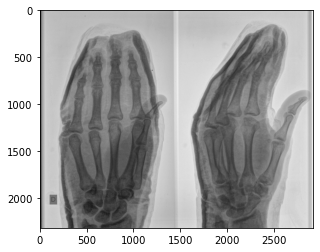

In [280]:
tmp = train_dcm_path[np.random.randint(0, 159)].dcmread()
final_img = tmp.pixel_array.astype(float)

plt.imshow(final_img, cmap='gray')
print(final_img)

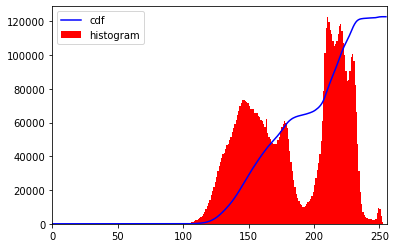

In [281]:

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = np.uint8((np.maximum(final_img,0)/final_img.max())*255)

hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

[[120 118 119 ... 248 248 251]
 [122 122 121 ... 249 248 249]
 [121 123 121 ... 251 249 248]
 ...
 [122 127 123 ... 248 249 248]
 [126 128 127 ... 248 247 248]
 [126 128 128 ... 250 247 248]]


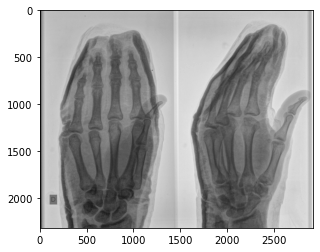

In [282]:
plt.imshow(img, cmap='gray')
print(img)

In [283]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

[[  3   2   2 ... 254 254 254]
 [  4   4   3 ... 254 254 254]
 [  3   5   3 ... 254 254 254]
 ...
 [  4   9   5 ... 254 254 254]
 [  8  11   9 ... 254 253 254]
 [  8  11  11 ... 254 253 254]]


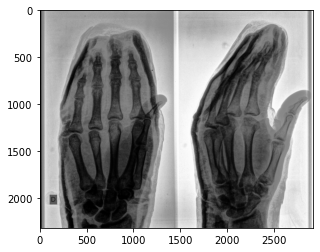

In [284]:
img2 = cdf[img]
plt.imshow(img2, cmap='gray')
print(img2)

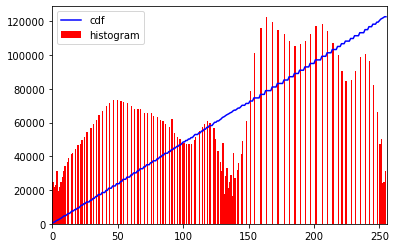

In [285]:
#img = np.uint8((np.maximum(final_img,0)/final_img.max())*255)

hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [286]:
import cv2
from matplotlib import pyplot as plt

X = []
y = []
for i in range(len(train_dcm_path)):
    tmp = train_dcm_path[i].dcmread()
    
    dcm_img = tmp.pixel_array.astype(float)
    
    img = np.uint8((np.maximum(dcm_img,0)/dcm_img.max())*255)


    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    rescaled_img = cdf[img]
    
    clahe = cv2.createCLAHE(clipLimit = 2.6)
    rescaled_img = clahe.apply(rescaled_img) + 30
    
    
    image = cv2.resize(rescaled_img, dsize=(128,128), interpolation=cv2.INTER_AREA)/255 #resizing and normalizing
    X.append(np.expand_dims(image,axis=-1))
    
    uid = str(tmp['SOPInstanceUID'].value)
    y.append(np.ndarray.flatten(np.array(train_merged_df.loc[train_merged_df['SOPInstanceUID'] == uid][train_merged_df.columns[64:]])))
    
X = np.array(X)
y = np.array(y)

C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


In [287]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [288]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [289]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, Dropout, MaxPooling2D, Flatten, Dense

cnn_model = Sequential()
cnn_model.add(InputLayer(input_shape=(128,128,1)))
              
cnn_model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
cnn_model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(4096, activation="relu"))
cnn_model.add(Dense(2048, activation="relu"))
cnn_model.add(Dense(22, activation="sigmoid"))

cnn_model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, 32, 32, 256)       295168    
                                                                 
 conv2d_88 (Conv2D)          (None, 32, 32, 256)     

In [290]:
history = cnn_model.fit(x = X_train,
                        y = y_train,
                        batch_size = 8,
                        callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
                        validation_data = (X_val, y_val),
                        verbose = 1,
                        epochs = 50)

Epoch 1/50
23/23 [==============================] - 25s 1s/step - loss: 0.7156 - accuracy: 0.3587 - val_loss: 0.1456 - val_accuracy: 0.5714
Epoch 2/50
23/23 [==============================] - 25s 1s/step - loss: 0.1669 - accuracy: 0.4185 - val_loss: 0.1222 - val_accuracy: 0.5714
Epoch 3/50
23/23 [==============================] - 25s 1s/step - loss: 0.1424 - accuracy: 0.4239 - val_loss: 0.1133 - val_accuracy: 0.5238
Epoch 4/50
23/23 [==============================] - 25s 1s/step - loss: 0.1322 - accuracy: 0.4239 - val_loss: 0.1678 - val_accuracy: 0.3810
Epoch 5/50
23/23 [==============================] - 24s 1s/step - loss: 0.1235 - accuracy: 0.4783 - val_loss: 0.1461 - val_accuracy: 0.4762
Epoch 6/50
23/23 [==============================] - 23s 1s/step - loss: 0.1174 - accuracy: 0.4946 - val_loss: 0.1944 - val_accuracy: 0.4286
Epoch 7/50
23/23 [==============================] - 24s 1s/step - loss: 0.1133 - accuracy: 0.5326 - val_loss: 0.2323 - val_accuracy: 0.4286
Epoch 8/50
23/23 [==

Plotting results of trained model involvs accuracy, validation accuracy, loss and validation loss

<ipython-input-231-3b2e4558555f>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


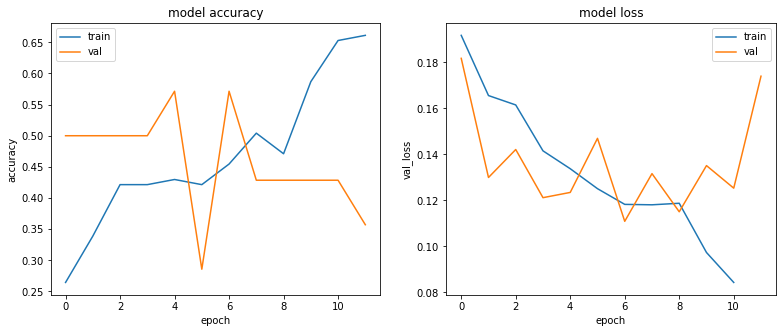

In [231]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='upper left')

ax[1].plot(history.history['loss'][1:])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('val_loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='upper right')

fig.show()

The accuracy of the model on test data:

In [291]:
cnn_model.evaluate(x = X_test,
                   y = y_test,
                   verbose=1)

2/2 [==============================] - 1s 131ms/step - loss: 0.2201 - accuracy: 0.5405


[0.22008171677589417, 0.5405405163764954]